## Unsupervised Learning - Part-4

### Domain : Sports

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Importing dataset
df = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Processing

In [3]:
#Dataset has empty rows and so removing all those
df = df.dropna(how='all')
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [4]:
# Shape of dataset
df.shape

(90, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [6]:
# Getting unique count
df.Name.nunique()

90

In [7]:
df.describe() 

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


### EDA

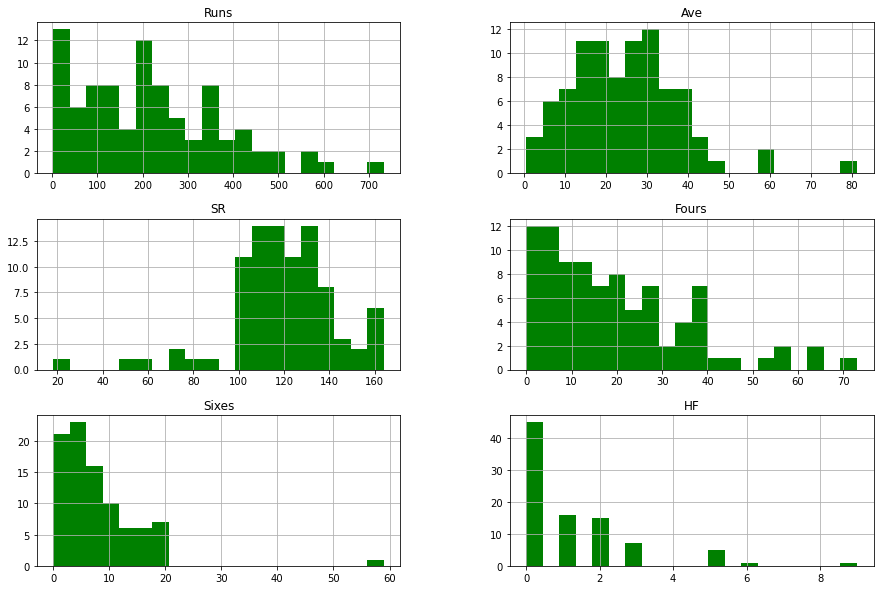

In [8]:
df.hist(bins = 20, figsize = (15, 10), color = 'green')
plt.show()

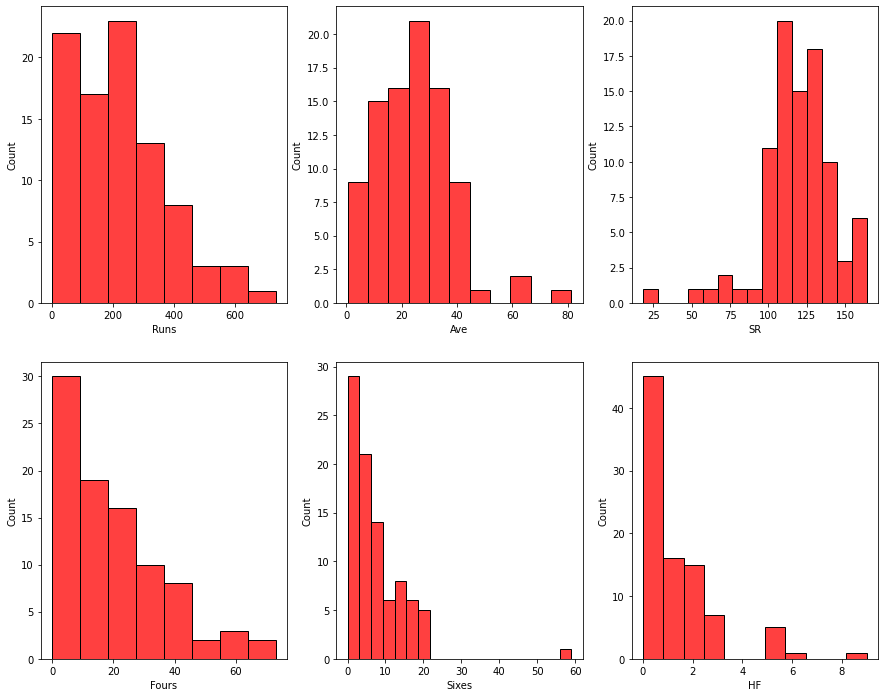

In [9]:
plt.figure(figsize=(15, 12))
col = 1
for i in df.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.histplot(df[i], color = 'r')
    col += 1

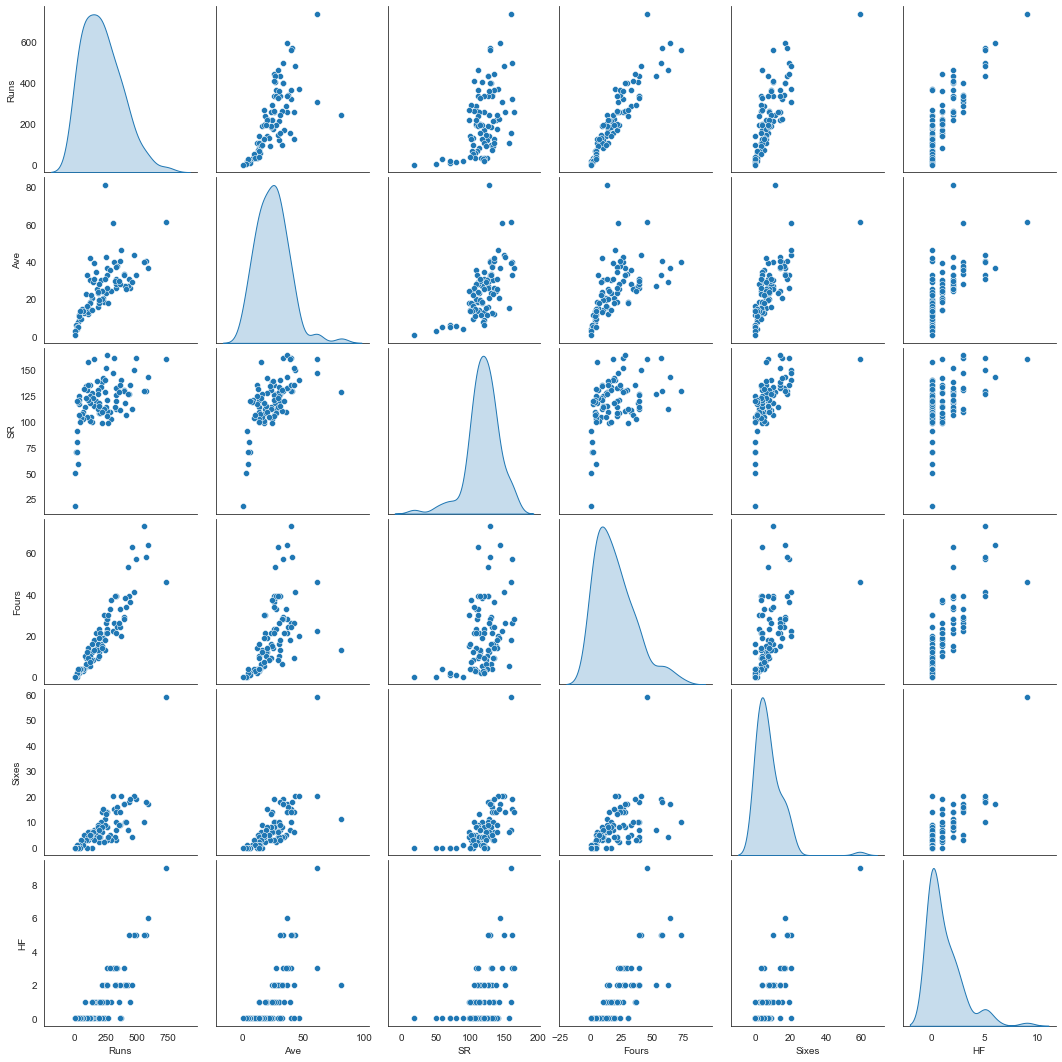

In [10]:
#Bivariate relationships of fields
sns.set_style("white")
sns.pairplot(df, diag_kind='kde')
plt.show()

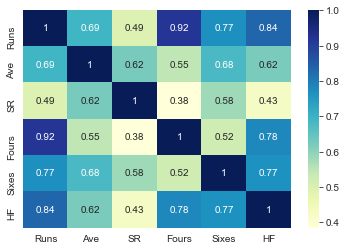

In [11]:
# Plotting the correlation heat map to understand the correlation between variables
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [12]:
### Creating Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
link_method = linkage(df.iloc[:,1:6], method = 'average')

In [14]:
labelList = np.array(df.Name)
labelList

array(['CH Gayle', 'G Gambhir', 'V Sehwag', 'CL White', 'S Dhawan',
       'AM Rahane', 'KP Pietersen', 'RG Sharma', 'AB de Villiers',
       'JP Duminy', 'DA Warner', 'SR Watson', 'F du Plessis', 'OA Shah',
       'DJ Bravo', 'DJ Hussey', 'SK Raina', 'AT Rayudu', 'Mandeep Singh',
       'R Dravid', 'DR Smith', 'M Vijay', 'SPD Smith', 'TM Dilshan',
       'RV Uthappa', 'SE Marsh', 'KA Pollard', 'DMD Jayawardene',
       'V Kohli', 'MA Agarwal', 'SR Tendulkar', 'MEK Hussey', 'JH Kallis',
       'MS Dhoni', 'MS Bisla', 'JD Ryder', 'BJ Hodge', 'NV Ojha',
       'DB Das', 'AC Gilchrist', 'BB McCullum', 'IK Pathan',
       'Azhar Mahmood', 'MK Pandey', 'S Badrinath', 'DA Miller',
       'MK Tiwary', 'JA Morkel', 'LRPL Taylor', 'M Manhas',
       'DT Christian', 'RA Jadeja', 'JEC Franklin', 'KC Sangakkara',
       'Y Nagar', 'STR Binny', 'SS Tiwary', 'KD Karthik', 'AL Menaria',
       'PA Patel', 'SC Ganguly', 'YK Pathan', 'Harbhajan Singh',
       'RE Levi', 'LR Shukla', 'Y Venugopal Rao', 

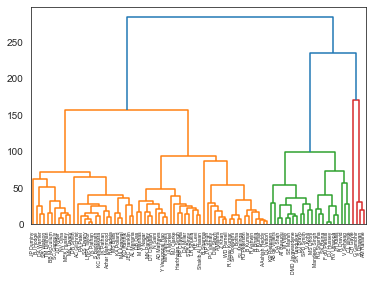

In [15]:
dend = dendrogram(link_method,labels = labelList)

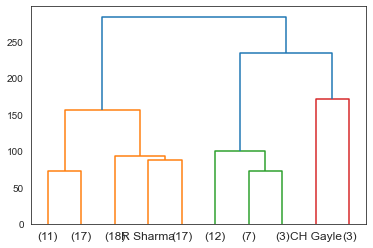

In [16]:
### Forming clusters from Dendrogram
dend = dendrogram(link_method, truncate_mode='lastp', p = 10, labels = labelList)

In [17]:
### Creating cluster using fcluster module
from scipy.cluster.hierarchy import fcluster

In [18]:
# setting 3 as maxclust to group players
clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

### Appending the newly created to original dataset

In [19]:
df['clusters'] = clusters

In [20]:
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,clusters
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,3
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,3
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,2
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,2
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,3


In [21]:
df.clusters.value_counts().sort_index()

1    64
2    22
3     4
Name: clusters, dtype: int64

In [22]:
aggdata=df.iloc[:,1:8].groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,Runs,Ave,SR,Fours,Sixes,HF,Freq
clusters,,,,,,,
1,139.218750,20.396719,114.097969,12.03125,4.625000,0.468750,64
2,383.272727,33.714091,129.966818,35.00000,12.818182,2.363636,22
3,613.000000,44.647500,140.807500,60.25000,26.000000,6.250000,4


### Cluster 1 : Top Players

### Cluster 2 : Medium performing players

### Cluster 3 : Players with low performance compared to others

----------------------------------------

### Ranking Top Players

In [23]:
Cluster_1 = df[df['clusters'] == 3]
Cluster_1.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,clusters
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,3
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,3
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,3
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,3


### Ranking Medium players

In [24]:
Cluster_2 = df[df['clusters'] == 2]
Cluster_2.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,clusters
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,2
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,2
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,2
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,2
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,2
25,F du Plessis,398.0,33.16,130.92,29.0,17.0,3.0,2
27,OA Shah,340.0,37.77,132.81,24.0,16.0,3.0,2
29,DJ Bravo,371.0,46.37,140.53,20.0,20.0,0.0,2
31,DJ Hussey,396.0,33.00,129.83,28.0,17.0,2.0,2
33,SK Raina,441.0,25.94,135.69,36.0,19.0,1.0,2


### Ranking Low performance players

In [25]:
Cluster_3 = df[df['clusters'] == 1]
Cluster_3.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,clusters
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,1
21,DA Warner,256.0,36.57,164.10,28.0,14.0,3.0,1
23,SR Watson,255.0,42.50,151.78,26.0,14.0,2.0,1
41,DR Smith,157.0,39.25,160.20,18.0,7.0,1.0,1
47,TM Dilshan,285.0,35.62,109.19,33.0,5.0,3.0,1
53,KA Pollard,220.0,24.44,138.36,15.0,14.0,2.0,1
59,MA Agarwal,225.0,20.45,142.40,19.0,15.0,1.0,1
63,MEK Hussey,261.0,32.62,110.59,28.0,8.0,2.0,1
69,MS Bisla,213.0,30.42,133.12,16.0,10.0,1.0,1
71,JD Ryder,256.0,25.60,120.75,23.0,8.0,2.0,1
